Import and clean data

In [2]:
import pandas as pd
import os
import glob

path = 'data/public'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
members   = pd.concat(df_from_each_file, ignore_index=True)

In [3]:
#fill in na with 0
members=members.fillna(0)

In [4]:
#add datetime and month/year column
import datetime
members["dt_join"] = pd.to_datetime(members["Joined Group on"])
members["date_join"] = pd.to_datetime(members["dt_join"].dt.strftime('%b %d, %Y'))

In [5]:
#members["month_year_join_date"] = pd.to_datetime(members["date_join"].dt.strftime("%Y %b")).date()
members["month_year_join"] = members["date_join"].dt.strftime("%Y %b")

In [6]:
#remove test data..
members = members[members.date_join > '2017-07-01']

In [8]:
#add if attended
import numpy as np
members["attended"] = np.where(members['Total RSVPs']>0, 'yes', 'no')

In [9]:
members.head()

,Unnamed: 0,is F,Joined Group on,Last visited group on,Last Attended,Total RSVPs,RSVPed Yes,RSVPed Maybe,RSVPed No,Meetups attended,Intro,Photo,Assistant Organizer,Mailing List,dt_join,date_join,month_year_join,attended
0,0,0.0,"July 10, 2017","May 25, 2018",0,1.0,1.0,0.0,0.0,0.0,No,Yes,No,Yes,2017-07-10,2017-07-10,2017 Jul,yes
1,1,0.0,"July 22, 2017","July 22, 2017",0,0.0,0.0,0.0,0.0,0.0,No,Yes,No,Yes,2017-07-22,2017-07-22,2017 Jul,no
2,2,0.0,"July 12, 2017","February 28, 2018","March 2, 2018",2.0,2.0,0.0,0.0,2.0,No,No,No,Yes,2017-07-12,2017-07-12,2017 Jul,yes
3,3,0.0,"February 22, 2018","March 1, 2018",0,1.0,0.0,0.0,1.0,0.0,No,Yes,No,Yes,2018-02-22,2018-02-22,2018 Feb,yes
4,4,0.0,"September 16, 2017","September 16, 2017",0,0.0,0.0,0.0,0.0,0.0,No,Yes,No,Yes,2017-09-16,2017-09-16,2017 Sep,no


In [10]:
members = members.sort_values(["dt_join"])

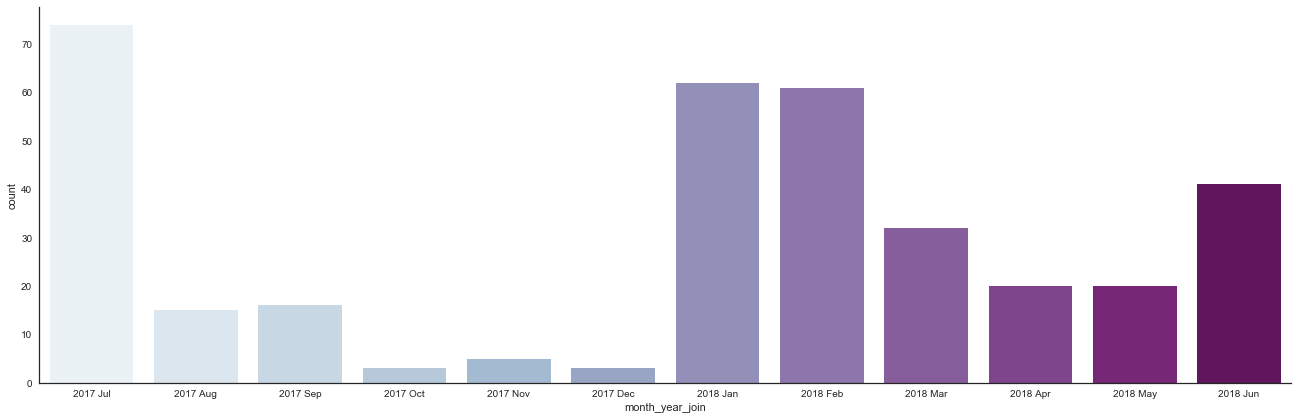

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="white", context="talk")
fig = plt.figure(figsize=(12, 12))
sns.set(style="white")

years_months = members.month_year_join.unique()

g = sns.factorplot(x='month_year_join', data=members, kind="count",
                   palette="BuPu", size=6, aspect=3)
#g.set_xticklabels(step=2)

fig.autofmt_xdate()

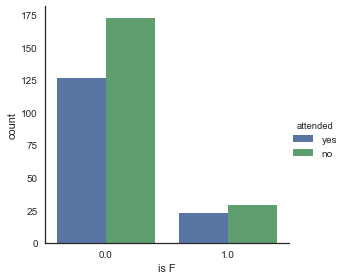

In [12]:
#plot people who attend vs join .. make this pretty..

sns.factorplot(x='is F', hue='attended',kind="count", data=members)